In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
def LoadDataset ( Path , Extension , SingleFile, ImageType ) :
    Datasets = []
    FileName = []
    if SingleFile : 
        FileName.append(Path + Extension )
        Path = ''
    else : 
        for File in os.listdir(os.path.dirname(Path)):
            if ImageType or Extension=="*" : 
                FileName.append(File) 
                continue 
            if File.endswith(Extension):
                FileName.append(File) 

    #Use this to check Correct file is added or not
    #print(FileName)
    if Extension == ".csv" :
        for EachFileName in FileName : 
            Dataset = []
            with open(Path + EachFileName , 'r') as File:
                Reader = csv.reader(File)
                for EachRow in Reader:
                    Dataset.append(EachRow)
            Datasets.append(Dataset)
    if ImageType : 
        for EachFileName in FileName : 
            img = cv2.imread(Path+EachFileName)
            Datasets.append(img)
    if len(Datasets) == 1 :
        Datasets = Datasets[0]
    return Datasets , FileName 

In [3]:
def ShowImage(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    plt.show()

yes =  385
no =  281


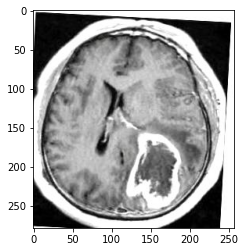

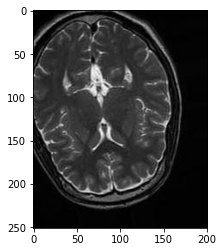

In [4]:
DatasetLocation = "../Datasets/brain_tumor_dataset/Augmented/"
Class = ["yes","no"]
Datasets = []
for EachClass in Class :
    Datasets.append(LoadDataset(DatasetLocation+EachClass+ "/", ".JPG" , False ,True ))
[[DataYes , dummy] , [DataNo , dummy]] = Datasets
print("yes = " , len(DataYes))
print("no = " ,  len(DataNo))
ShowImage(DataYes[0])
ShowImage(DataNo[0])

In [5]:
import imutils 
def CropImage(imagelist , pixel= 0 ) : 
    set_new = []
    for img in imagelist:
        gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray , (5,5) , 0 )
        
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)
        
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = pixel
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return set_new

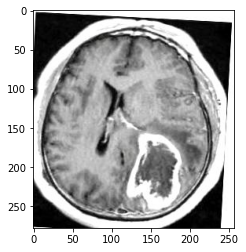

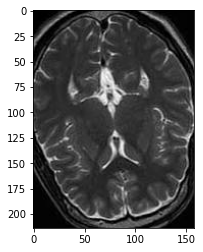

In [6]:
DataYesCrop = CropImage(imagelist = DataYes)
DataNoCrop = CropImage( imagelist= DataNo)
ShowImage(DataYesCrop[0])
ShowImage(DataNoCrop[0])

In [7]:
def Preprocess(Data) : 
    ProcessedData = []
    for Image in Data:
        face = cv2.resize(Image, (32, 32) )
        (b, g, r)=cv2.split(face) 
        Image=cv2.merge([r,g,b])
        ProcessedData.append(Image)
    ProcessedData = np.squeeze(ProcessedData)
    ProcessedData = ProcessedData.astype('float32')
    ProcessedData /= 255
    np.array(ProcessedData).shape
    return ProcessedData

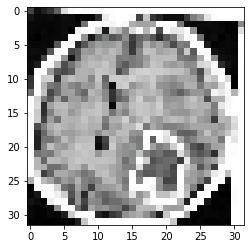

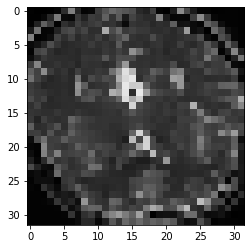

In [8]:
DataYesCrop = Preprocess(DataYesCrop)
DataNoCrop = Preprocess(DataNoCrop)
ShowImage(DataYesCrop[0])
ShowImage(DataNoCrop[0])

In [9]:
def FeatureExtract (Data): 
    from keras import Model
    from keras.models import load_model
    model = load_model('model2.h5')

    model.layers.pop()
    model.layers.pop()
    ModelFeatureExtractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

    return ModelFeatureExtractor.predict(Data)

In [20]:
def DrawHeatmap1D(Vector) : 
    plt.rcParams["figure.figsize"] = 15,3
    extent=[0, 512,0,1]
    plt.imshow([Vector], aspect = "auto", cmap="viridis", extent=extent)
    fig1 = plt.gca().set_yticks([])
    plt.show()


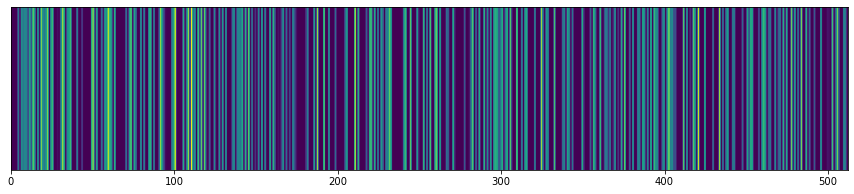

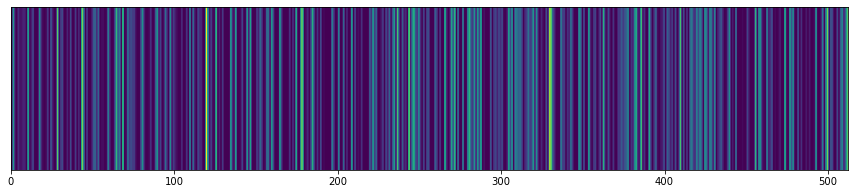

<Figure size 1080x216 with 0 Axes>

In [22]:
FeaturesYes = FeatureExtract(np.array(DataYesCrop))
DrawHeatmap1D(FeaturesYes[0])
FeaturesNo = FeatureExtract(np.array(DataNoCrop))
DrawHeatmap1D(FeaturesNo[0])

In [37]:
FeaturesYes
np.savetxt('FeatureYes.txt', FeaturesYes , fmt='%f')
np.savetxt('FeaturesNo.txt', FeaturesNo , fmt='%f')


In [35]:
len(FeaturesYes)

385

In [36]:
len(a)

385